In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_450634d1d694456a979b5dcbe8a5a9df = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='d3G6-9qbRwk0QzcpzWy3qGruwtE132mjJGU3TuUkFPQL',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_450634d1d694456a979b5dcbe8a5a9df.get_object(Bucket='populationregression-donotdelete-pr-t1yq0ytryodtoi',Key='India_population.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
dataset = pd.read_csv(body)
dataset.head()


,Year,Avg_Population
0,1981,716493000
1,1982,733152000
2,1983,750034000
3,1984,767147000
4,1985,784491000


In [3]:
dataset.dropna()

,Year,Avg_Population
0,1981,716493000
1,1982,733152000
2,1983,750034000
3,1984,767147000
4,1985,784491000
5,1986,802052000
6,1987,819800000
7,1988,837700000
8,1989,855707000
9,1990,873785000


In [4]:
dataset.isnull().any()

Year              False
Avg_Population    False
dtype: bool

In [5]:
indep=dataset.iloc[:,0:1] # independent variables
indep

,Year
0,1981
1,1982
2,1983
3,1984
4,1985
5,1986
6,1987
7,1988
8,1989
9,1990


In [6]:
dep=dataset.iloc[:,1:] # dependent variables
dep

,Avg_Population
0,716493000
1,733152000
2,750034000
3,767147000
4,784491000
5,802052000
6,819800000
7,837700000
8,855707000
9,873785000


In [7]:
indep=indep.values
indep

array([[1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014]])

In [8]:
dep=dep.values
dep

array([[ 716493000],
       [ 733152000],
       [ 750034000],
       [ 767147000],
       [ 784491000],
       [ 802052000],
       [ 819800000],
       [ 837700000],
       [ 855707000],
       [ 873785000],
       [ 891910000],
       [ 910065000],
       [ 928226000],
       [ 946373000],
       [ 964486000],
       [ 982553000],
       [1000558000],
       [1018471000],
       [1036259000],
       [1053898000],
       [1071374000],
       [1088694000],
       [1105886000],
       [1122991000],
       [1140043000],
       [1157039000],
       [1134024000],
       [1150196000],
       [1166228000],
       [1182108000],
       [1197658000],
       [1212827000],
       [1227012000],
       [1233542000]])

from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
indep_poly=poly_reg.fit_transform(indep)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#poly_reg=PolynomialFeatures(degree=4)
#indep_poly=poly_reg.fit_transform(indep)
from sklearn.pipeline import Pipeline #pipelining  
pipe=Pipeline([('poly',PolynomialFeatures(degree=4)),('reg',LinearRegression())])

In [10]:
indep.shape

(34, 1)

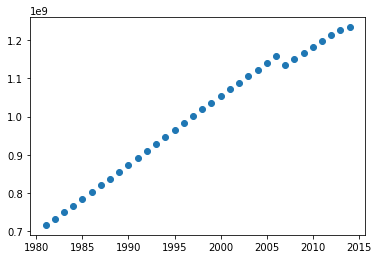

In [11]:
plt.scatter(indep,dep)


In [12]:
#pipe.fit(indep_poly,dep)
pipe.fit(indep,dep)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

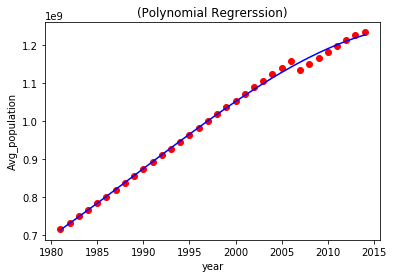

In [13]:
#indep_grid=np.arrange(min(indep),max(indep),0.1)
plt.scatter(indep,dep,color = 'red')
#plt.plot(indep,pipe.predict(poly_reg.fit_transform(indep)),color = 'blue')
plt.plot(indep,pipe.predict(indep),color = 'blue')
plt.title('(Polynomial Regrerssion)')
plt.xlabel('year')
plt.ylabel('Avg_population')
plt.show()

In [14]:
dep_predict=pipe.predict(indep)
dep_predict

array([[7.14425043e+08],
       [7.31706142e+08],
       [7.49207201e+08],
       [7.66900801e+08],
       [7.84758957e+08],
       [8.02753113e+08],
       [8.20854132e+08],
       [8.39032292e+08],
       [8.57257277e+08],
       [8.75498169e+08],
       [8.93723444e+08],
       [9.11900962e+08],
       [9.29997959e+08],
       [9.47981043e+08],
       [9.65816182e+08],
       [9.83468700e+08],
       [1.00090327e+09],
       [1.01808389e+09],
       [1.03497392e+09],
       [1.05153601e+09],
       [1.06773214e+09],
       [1.08352360e+09],
       [1.09887098e+09],
       [1.11373416e+09],
       [1.12807229e+09],
       [1.14184381e+09],
       [1.15500642e+09],
       [1.16751709e+09],
       [1.17933201e+09],
       [1.19040664e+09],
       [1.20069565e+09],
       [1.21015295e+09],
       [1.21873166e+09],
       [1.22638410e+09]])

In [16]:
#dep_predict=pipe.predict(poly_reg.fit_transform([[1982]]))
dep_predict=pipe.predict([[1982]])
dep_predict

array([[7.31706142e+08]])

In [18]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [19]:
wml_credentials={
  "apikey": "MOvpZ-YXN8rLHYqMRTN3HvVOmcOqql6HEszrvV-mpN3F",
  "iam_apikey_description": "Auto-generated for key 99f1c73e-c8db-45c3-a067-b4be73052f0c",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/35572197485548cab724a9f87701693f::serviceid:ServiceId-b5666965-db78-4d1b-b288-234e5af0878a",
  "instance_id": "f6d884bf-a4c7-43a8-aad8-09c1b392d9d1",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [20]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [21]:
metadata ={ 
    client.repository.ModelMetaNames.DESCRIPTION:'India_population.csv',
    client.repository.ModelMetaNames.AUTHOR_NAME : 'Sushmasri',
    client.repository.ModelMetaNames.NAME:"Pipe",
    client.repository.ModelMetaNames.FRAMEWORK_NAME:"scikit-learn",
    client.repository.ModelMetaNames.FRAMEWORK_VERSION:'0.19'
}

In [23]:
model_details=client.repository.store_model(pipe,meta_props= metadata)

In [24]:
published_model_uid=client.repository.get_model_uid(model_details)
published_model_uid

'22df84d3-1b6a-42ac-a95c-8033367d7241'

In [25]:
created_deployment=client.deployments.create(published_model_uid,name="Pipe")



#######################################################################################

Synchronous deployment creation for uid: '22df84d3-1b6a-42ac-a95c-8033367d7241' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='2c1769b1-4fa2-45ed-9981-136dc299b4a1'
------------------------------------------------------------------------------------------------




In [26]:
scoring_endpoint=client.deployments.get_url(created_deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f6d884bf-a4c7-43a8-aad8-09c1b392d9d1/deployments/2c1769b1-4fa2-45ed-9981-136dc299b4a1'

In [27]:
client.deployments.list()

------------------------------------  -----------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME         TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
2c1769b1-4fa2-45ed-9981-136dc299b4a1  Pipe         online  DEPLOY_SUCCESS  2019-11-15T11:09:18.768Z  scikit-learn-0.20  model
806eb752-848b-4bc8-abd5-8bf601a55169  Pipe         online  DEPLOY_SUCCESS  2019-11-14T18:57:10.530Z  scikit-learn-0.20  model
260ba6f9-d6b8-4b41-9294-cc1d1e5f0d15  Naive Bayes  online  DEPLOY_SUCCESS  2019-11-14T18:21:50.476Z  scikit-learn-0.20  model
05e9d11d-20af-43ed-bc8a-8d32d59627ff  Naive Bayes  online  DEPLOY_SUCCESS  2019-11-14T10:32:23.202Z  scikit-learn-0.20  model
------------------------------------  -----------  ------  --------------  ------------------------  -----------------  -------------
